# Final assignment

<br/> Martynas Motiejunas
<br/> email: martynas.mo8777@go.kauko.lt

## Task:

Download 10 years of data from website: https://finance.yahoo.com/ company of choice and build a neural networks to predict it's stock price.

## Data loading and pre-processing

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
#importing the dataset and loading the file contents 
dataset_train = pd.read_csv('INTEL_train.csv')
#calling head() function to see if the file is read
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-07-30,19.570000,19.799999,19.299999,19.330000,14.056325,60640900
1,2009-07-31,19.340000,19.559999,19.250000,19.250000,13.998153,47557600
2,2009-08-03,19.480000,19.559999,19.180000,19.370001,14.085413,44330800
3,2009-08-04,19.209999,19.379999,19.150000,19.320000,14.049059,46880800
4,2009-08-05,19.270000,19.299999,18.860001,18.860001,13.814657,60035000


In [3]:
# Seperating "Open" column data because we are going to use it to train our neural network
training_set = dataset_train.iloc[:, 1:2].values 
# Show separated "Open" colum data in an array
training_set

array([[19.57    ],
       [19.34    ],
       [19.48    ],
       ...,
       [52.689999],
       [51.529999],
       [51.709999]])

### Feature Scaling

Next we need to rescale our data to the range from 0 to 1 using MinMaxScaler. 


In [4]:
# Feature Scaling

# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Creating a scaler instance to rescale all data to the range of 0 to 1
sc = MinMaxScaler(feature_range = (0, 1))

In [6]:
#Creating the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)
#Then checking it with this command:
training_set_scaled

array([[0.04120949],
       [0.0356011 ],
       [0.0390149 ],
       ...,
       [0.84881736],
       [0.82053158],
       [0.82492075]])

### Splitting the training set to dependent and independent variables

In [7]:
#Creating a data structure

#The 90 stock prices in the last 4.5 months before today
X_train = [] 

In [8]:
#The stock price today
y_train = [] 

In [9]:
# we start from day 90 because that is the first instance allowing us to 
# go back 90 days
for i in range(90, 2517): 
    # 0 is the column ID, the only column in this case.    
    # put the last 90 days values in one row of X_train
    X_train.append(training_set_scaled[i-90:i, 0]) 
    y_train.append(training_set_scaled[i, 0])


In [10]:
#Converting the X and Y arrays into NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

X_train

array([[0.04120949, 0.0356011 , 0.0390149 , ..., 0.04437947, 0.0458425 ,
        0.05632777],
       [0.0356011 , 0.0390149 , 0.03243111, ..., 0.0458425 , 0.05632777,
        0.05681541],
       [0.0390149 , 0.03243111, 0.0338942 , ..., 0.05632777, 0.05681541,
        0.05779081],
       ...,
       [0.89222146, 0.8822239 , 0.87881002, ..., 0.83199222, 0.83150454,
        0.84442816],
       [0.8822239 , 0.87881002, 0.89051458, ..., 0.83150454, 0.84442816,
        0.84881736],
       [0.87881002, 0.89051458, 0.85564501, ..., 0.84442816, 0.84881736,
        0.82053158]])

### Reshaping the Matrix

We need to add a new matrix dimension to accommodate the indicator (predictor). 

NumPy matrices are tensors (3D) and essentially we need to specify that our matrix consists of **90 days** (dimension x) times **total days in data set** (dimension y) times **1 value per matrix cell (scalar)** (dimension z)

In [11]:
#Reshaping the data matrix, we retain the 2 original dimensions and add a third of depth=1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [13]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

### Adding First Layer


In [14]:
# Adding the input layer and the LSTM (Long short-term memory) layer
regressor.add(LSTM(units = 70, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# the argument is the dropout rate to ignore in the layers (20%)
regressor.add(Dropout(0.2))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Adding More Layers

We can add more LSTM layers but along with Dropout regularization to make sure we avoid overfitting! 


In [16]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# Adding a fourth LSTM layer and some Dropout regularisation
# we removed the return_sequences because we no longer return a 
# sequence but a value instead
regressor.add(LSTM(units = 70))
regressor.add(Dropout(0.2))

### Adding Output Layer & Compiling

The output has 1 dimension , i.e. one value to be predicted thus or output fully connected layer has dimensionality = 1.

- **Optimizer**: rmsprop is recommended in the Keras documentation. The Adam optimizer is also a powerful choice.
- **Loss function**: regression problems take the mean square error as most common

In [19]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [20]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Train and deploy the RNN

### Fit the RNN to the Training set

We now want to train our RNN using the data in our **Training Set X** and **predictors in y** (ground truth in this case). Parameters that can be specified are the:

- **Batch size**:  update the cell weights not on every stock price on every batch_size values; 
- **Number of epochs**: how many iterations to be used, i.e. number of forward and backward propagations for the update of the weights


In [21]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2427/2427 [==============================] - 18s 7ms/step - loss: 0.0146
Epoch 2/100
2427/2427 [==============================] - 15s 6ms/step - loss: 0.0028
Epoch 3/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0028
Epoch 4/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0025
Epoch 5/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0024
Epoch 6/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0023
Epoch 7/100
2427/2427 [==============================] - 15s 6ms/step - loss: 0.0023
Epoch 8/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0023
Epoch 9/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0019
Epoch 10/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0019
Epoch 11/100
2427/2427 [==============================] - 14s 6ms/step - loss: 0.0019
Epoch 12/100
24

2427/2427 [==============================] - 17s 7ms/step - loss: 6.1083e-04
Epoch 91/100
2427/2427 [==============================] - 17s 7ms/step - loss: 6.2171e-04
Epoch 92/100
2427/2427 [==============================] - 17s 7ms/step - loss: 6.7024e-04
Epoch 93/100
2427/2427 [==============================] - 17s 7ms/step - loss: 6.6338e-04
Epoch 94/100
2427/2427 [==============================] - 17s 7ms/step - loss: 6.2353e-04
Epoch 95/100
2427/2427 [==============================] - 17s 7ms/step - loss: 6.8529e-04
Epoch 96/100
2427/2427 [==============================] - 17s 7ms/step - loss: 6.3264e-04
Epoch 97/100
2427/2427 [==============================] - 18s 7ms/step - loss: 6.7623e-04
Epoch 98/100
2427/2427 [==============================] - 17s 7ms/step - loss: 6.3252e-04
Epoch 99/100
2427/2427 [==============================] - 18s 7ms/step - loss: 6.9561e-04
Epoch 100/100
2427/2427 [==============================] - 18s 7ms/step - loss: 6.1416e-04


In [22]:
# Getting the real stock price data file for testing our RNN

dataset_test = pd.read_csv('INTEL_test.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-31,51.509998,51.720001,50.049999,50.549999,50.210991,24169800
1,2019-08-01,50.520000,51.889999,49.470001,49.500000,49.168034,34020800
2,2019-08-02,49.090000,49.360001,48.500000,48.680000,48.353531,27881600
3,2019-08-05,47.759998,47.959999,46.570000,46.970001,46.655003,38936600
4,2019-08-06,47.150002,47.560001,46.770000,46.959999,46.959999,26119600
5,2019-08-07,46.299999,46.880001,45.970001,46.730000,46.730000,29440400
6,2019-08-08,46.160000,47.369999,45.910000,47.169998,47.169998,30643700
7,2019-08-09,46.939999,47.000000,45.779999,45.980000,45.980000,24975500
8,2019-08-12,45.759998,46.070000,45.439999,45.599998,45.599998,18490300
9,2019-08-13,45.490002,47.049999,45.360001,46.840000,46.840000,28959500


In [23]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

23

In [24]:
real_stock_price

array([[51.509998],
       [50.52    ],
       [49.09    ],
       [47.759998],
       [47.150002],
       [46.299999],
       [46.16    ],
       [46.939999],
       [45.759998],
       [45.490002],
       [46.060001],
       [46.099998],
       [46.34    ],
       [47.459999],
       [47.029999],
       [47.110001],
       [47.279999],
       [46.349998],
       [45.82    ],
       [45.869999],
       [45.700001],
       [46.459999],
       [47.240002]])

In [25]:
# axis = 0 means concatenate the lines (i.e. vertical axis)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 
dataset_total.size

2540

In [26]:
dataset_test.size

161

In [27]:
# the difference in the length of the first two gives us 
# the first day in 2019, and we need to go back 90 days to get the necessary range
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs.size

113

In [28]:
# we did not use iloc from panda so lets reshape the numpy array for 
# compatibility: i.e. all the values from input lines to be stacked in one 
# column. The -1 means that the numpy has no knowledge of how the 
# values were stored in lines. The 1 means we want to put them in one 
# column.

inputs = inputs.reshape(-1,1) 

# apply the feature scaler
inputs = sc.transform(inputs)
inputs

array([[0.89051458],
       [0.85564501],
       [0.86417949],
       [0.87076325],
       [0.86247259],
       [0.87588393],
       [0.88905148],
       [0.89368447],
       [0.90587662],
       [0.91172887],
       [0.92343333],
       [0.91197269],
       [0.91367957],
       [0.91294809],
       [0.92367713],
       [0.93465009],
       [0.94074616],
       [0.94562304],
       [0.98902707],
       [0.99561083],
       [0.98195569],
       [1.        ],
       [0.99097783],
       [0.98561327],
       [0.85003665],
       [0.8361375 ],
       [0.80760792],
       [0.81004631],
       [0.80273104],
       [0.80955872],
       [0.7893197 ],
       [0.79785416],
       [0.78810051],
       [0.73201665],
       [0.69641551],
       [0.66934901],
       [0.66569132],
       [0.65935135],
       [0.67276279],
       [0.66569132],
       [0.63691785],
       [0.64520851],
       [0.64057554],
       [0.62155572],
       [0.65130458],
       [0.65301149],
       [0.62106801],
       [0.644

In [37]:
# Getting the predicted stock price of 2019
X_test = []

In [38]:
# the first 90 from inputs are from training set; starting
# from 90 and get the extra 20, i.e. up to 110
for i in range(90, 110): 
    X_test.append(inputs[i-90:i, 0])

In [39]:
X_test = np.array(X_test) # not 3D structure yet

In [40]:
# create a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [41]:
predicted_stock_price = regressor.predict(X_test)

In [42]:
# need to inverse the scaling to get meaningful predicted stock price # outputs
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

20

### Result Visualization


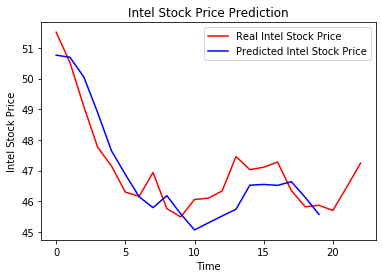

In [43]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Intel Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Intel Stock Price')

plt.title('Intel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Intel Stock Price')
plt.legend()

plt.show()

Some observations:
- The prediction lags behind the actual price curve because the model cannot react to fast non-linear changes. Spikes are examples of fast non-linear changes
- Model reacts pretty well to smooth changes

### Compute the RMSE

If we need to compute the RMSE for our Stock Price Prediction problem, we use the real stock price and predicted stock price as shown. 


In [44]:
#import the libraries
import math
from sklearn.metrics import mean_squared_error

In [47]:
rmse = math.sqrt( mean_squared_error( real_stock_price[0:20,:], predicted_stock_price))
rmse

0.7596389700507931